<a href="https://colab.research.google.com/github/Aashishc-prog/NETFLIX_Recommender_system/blob/main/Capstone_Netflix_Recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##**Importing Libraries**

In [1]:
#Importing Librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MultiLabelBinarizer
import scipy

# figure size in inches
rcParams['figure.figsize'] = 25,8

import warnings
warnings.filterwarnings('ignore')

from scipy.stats  import norm


from sklearn.preprocessing import OneHotEncoder
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

from tqdm import tqdm

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df.shape

(7787, 12)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#**Exploratory Data Analysis**

##Checking for null values

In [6]:
print(f'shape is {df.shape}')
print(f'columns:{list(df.columns)}')

shape is (7787, 12)
columns:['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [7]:
df.isnull().sum()[df.isnull().sum() !=0]

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

##Checking if TV Shows have repititions as different seasons

In [8]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [9]:
len(df[df['type']=='TV Show']['title'].unique()) #therefore all titles are unique no season 1 and season 2 type of data exists

2410

##Getting top 10 directors (by number of movies directed), their country and the type of work

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

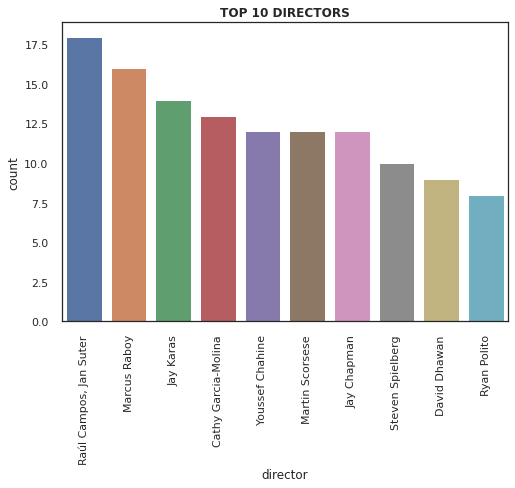

In [10]:
sns.set_theme(style='white')
sns.countplot(x='director', data = df , order = pd.DataFrame(df['director'].value_counts()).head(10).index)
plt.title('TOP 10 DIRECTORS',weight='bold')
plt.xticks(rotation = 90)

In [11]:
top_dir = pd.DataFrame(df['director'].value_counts()).index
dir_country = []
dir_genre = []
dir_type = []
for i in range(10):
  dir_country.append(list(df[df['director']==top_dir[i]]['country'].unique()))
  dir_genre.append(list(df[df['director']==top_dir[i]]['listed_in'].unique()))
  dir_type.append(list(df[df['director']==top_dir[i]]['type'].unique()))
dir_country_dict=dict(zip(list(top_dir[0:10]),dir_country))
dir_genre_dict=dict(zip(list(top_dir[0:10]),dir_genre))
dir_type_dict=dict(zip(list(top_dir[0:10]),dir_type))

In [12]:
dir_country_dict

{'Raúl Campos, Jan Suter': ['Mexico', 'Colombia', 'Argentina', 'Chile'],
 'Marcus Raboy': ['United States', nan],
 'Jay Karas': ['United States'],
 'Cathy Garcia-Molina': ['Philippines'],
 'Youssef Chahine': ['Egypt, Algeria',
  'France, Egypt',
  'Egypt',
  'Egypt, France'],
 'Martin Scorsese': ['United States',
  'United States, Italy',
  'United Kingdom, United States, France',
  'United Kingdom, United States, Japan',
  'United States, Hong Kong'],
 'Jay Chapman': ['United States'],
 'Steven Spielberg': ['United States, Canada',
  'United States',
  'United States, India',
  'United States, New Zealand, United Kingdom'],
 'David Dhawan': ['India'],
 'Ryan Polito': ['United States']}

In [13]:
dir_genre_dict

{'Raúl Campos, Jan Suter': ['Stand-Up Comedy'],
 'Marcus Raboy': ['Stand-Up Comedy',
  'Stand-Up Comedy & Talk Shows, TV Comedies'],
 'Jay Karas': ['Stand-Up Comedy',
  'Children & Family Movies, Comedies, Sports Movies'],
 'Cathy Garcia-Molina': ['Dramas, International Movies, Romantic Movies',
  'International Movies, Romantic Movies',
  'Comedies, Dramas, International Movies',
  'Comedies, International Movies, Romantic Movies'],
 'Youssef Chahine': ['Classic Movies, Dramas, International Movies',
  'Dramas, International Movies',
  'Action & Adventure, Classic Movies, Dramas',
  'Dramas, International Movies, Romantic Movies'],
 'Martin Scorsese': ['Classic Movies, Comedies, Dramas',
  'Dramas',
  'Classic Movies, Dramas',
  'Children & Family Movies, Dramas',
  'Classic Movies, Dramas, Independent Movies',
  'Documentaries, Music & Musicals',
  'Classic Movies, Dramas, Sports Movies',
  'Classic Movies, Dramas, Thrillers',
  'Dramas, Thrillers'],
 'Jay Chapman': ['Stand-Up Comedy

In [14]:
dir_type_dict

{'Raúl Campos, Jan Suter': ['Movie'],
 'Marcus Raboy': ['Movie', 'TV Show'],
 'Jay Karas': ['Movie'],
 'Cathy Garcia-Molina': ['Movie'],
 'Youssef Chahine': ['Movie'],
 'Martin Scorsese': ['Movie'],
 'Jay Chapman': ['Movie'],
 'Steven Spielberg': ['Movie'],
 'David Dhawan': ['Movie'],
 'Ryan Polito': ['Movie', 'TV Show']}

##Top 10 actors (by number of movies appeared in)

In [15]:
work_df = pd.DataFrame(df['cast']).dropna().reset_index(drop=True)

In [16]:
actors = np.array([])
for i in range(work_df.shape[0]):
  actors_list = work_df['cast'][i].split(',')
  actors = np.append(actors,actors_list)

In [17]:
actors_df = pd.DataFrame(actors,columns=['actors'])

In [18]:
actors_df

,actors
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
...,...
55950,Anita Shabdish
55951,Chittaranjan Tripathy
55952,Nasty C
55953,Adriano Zumbo


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

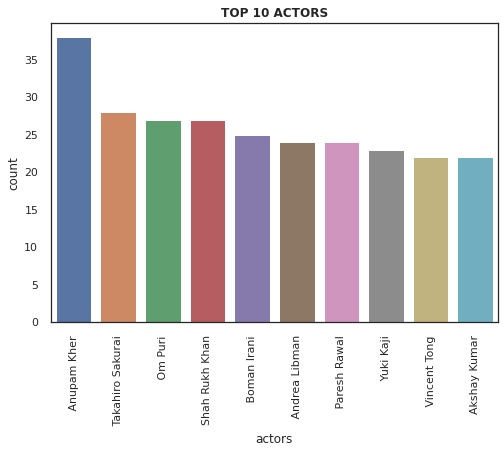

In [19]:
sns.set_theme(style='white')
sns.countplot(x='actors', data = actors_df , order = actors_df['actors'].value_counts().head(10).index)
plt.title('TOP 10 ACTORS',weight='bold')
plt.xticks(rotation = 90)

##Top 10 countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

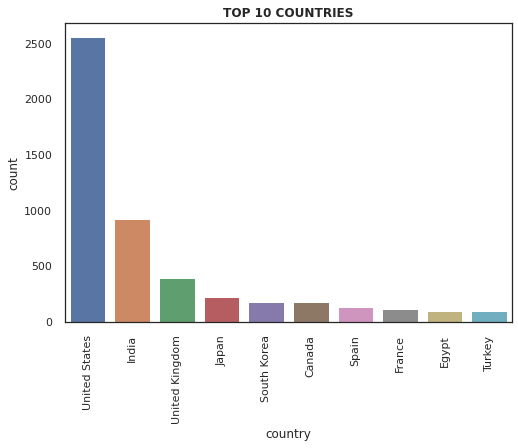

In [20]:
sns.set_theme(style='white')
sns.countplot(x='country', data = df , order = pd.DataFrame(df['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES',weight='bold')
plt.xticks(rotation = 90)

In [21]:
moviesdf = df[df['type']=='Movie']

In [22]:
tvdf = df[df['type']=='TV Show']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

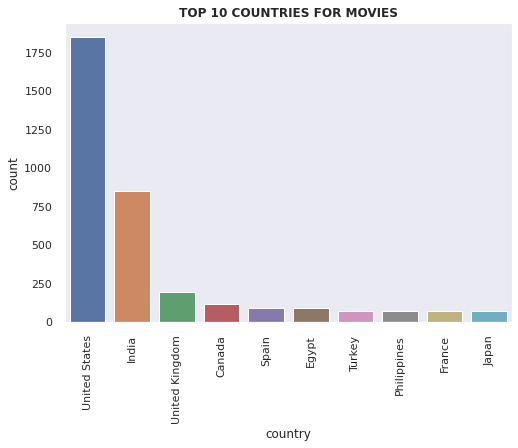

In [23]:
sns.set_theme(style='dark')
sns.countplot(x='country', data = moviesdf , order = pd.DataFrame(moviesdf['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES FOR MOVIES',weight='bold')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

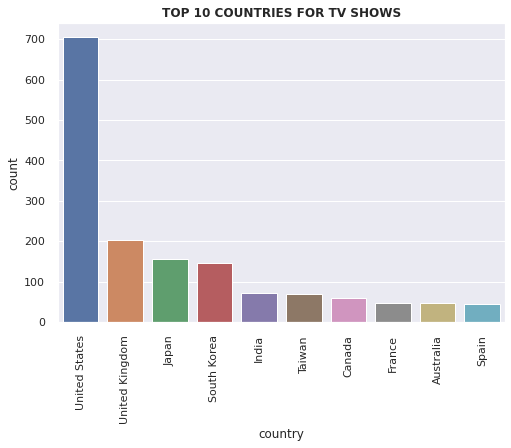

In [24]:
sns.set_theme(style='darkgrid')
sns.countplot(x='country', data = tvdf , order = pd.DataFrame(tvdf['country'].value_counts()).head(10).index)
plt.title('TOP 10 COUNTRIES FOR TV SHOWS',weight='bold')
plt.xticks(rotation = 90)

##When movies are added to the netflix

In [25]:
df2 = pd.DataFrame(df['date_added']).dropna().reset_index(drop=True)

In [26]:
df2.head()

,date_added
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"


In [27]:
df2['month_added'] = df['date_added'].apply(lambda x: str(x).split()[0])

In [28]:
df2=df2.dropna()

In [29]:
df2.head()

,date_added,month_added
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


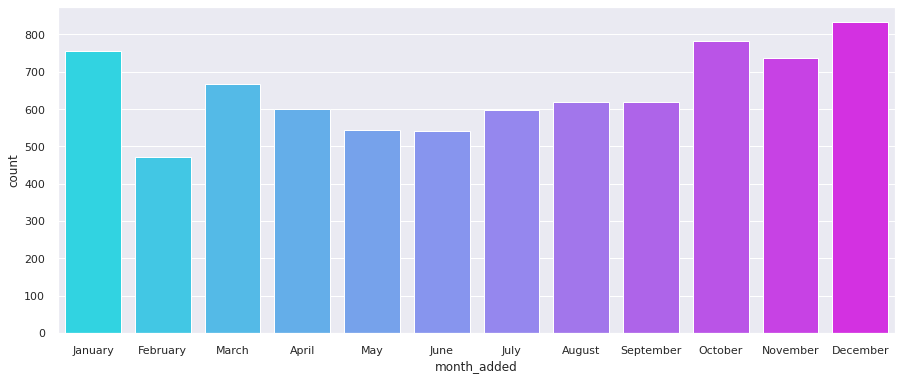

In [30]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df2,order=new_order,palette='cool')

##How ratings changed over the years ?

In [31]:
wdf = pd.DataFrame(df['release_year'].value_counts()).sort_index().rename(columns={'release_year':'movie_counts'}).reset_index()

<BarContainer object of 73 artists>

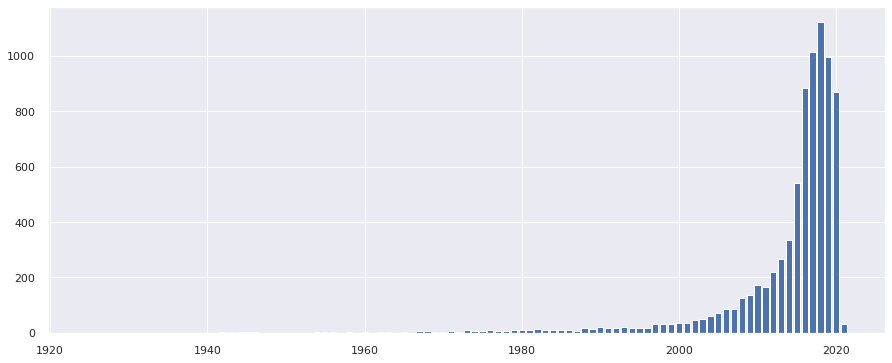

In [32]:
plt.bar(wdf['index'],wdf['movie_counts'])

Since, number of movies is extremely less for the early years we work only with movies released after 2000

<BarContainer object of 22 artists>

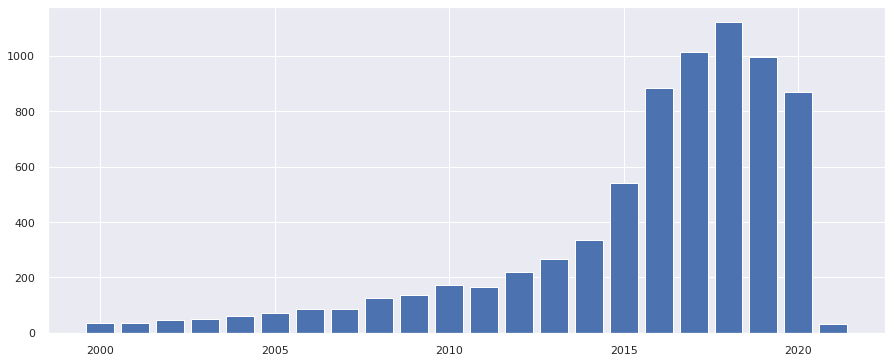

In [33]:
wdf = wdf[wdf['index']>=2000]
plt.bar(wdf['index'],wdf['movie_counts'])

In [34]:
movie_df = df[df['type']=='Movie']
movie_df = movie_df[movie_df['release_year']>=2000]
mdf = movie_df[['rating','release_year']].dropna().reset_index(drop=True)
mdf = mdf[mdf['rating'].isin(['R','PG-13','PG','G','NR','UR'])]
rdf = mdf.groupby(['release_year','rating']).agg({'rating':'count'}).fillna(0).rename(columns={'rating':'count'})

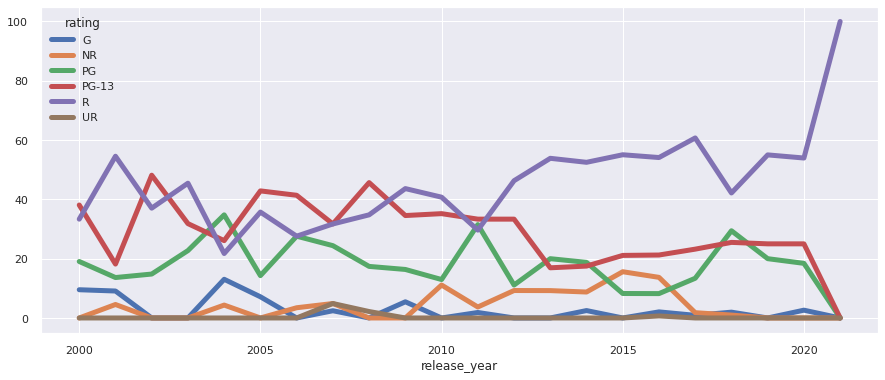

In [35]:
rdf.groupby(['release_year'])['count'].transform(lambda x: x*100/x.sum()).unstack().fillna(0).plot(linewidth=5.0)

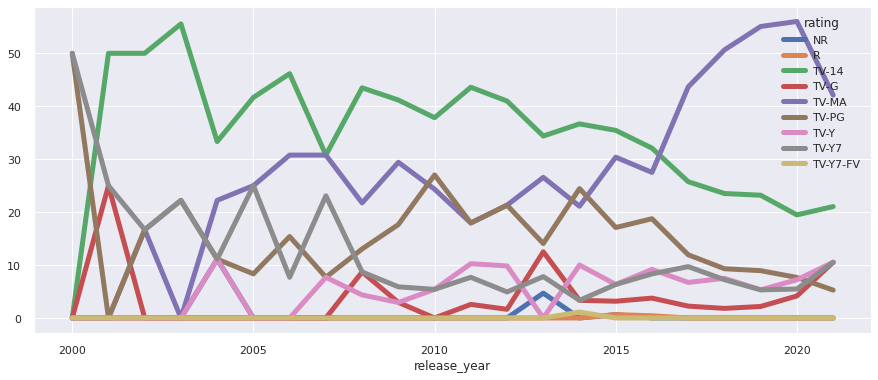

In [36]:
show_df = df[df['type']=='TV Show']
show_df = show_df[show_df['release_year']>=2000]
mdf = show_df[['rating','release_year']].dropna().reset_index(drop=True)
sdf = mdf.groupby(['release_year','rating']).agg({'rating':'count'}).fillna(0).rename(columns={'rating':'count'})
sdf.groupby(['release_year'])['count'].transform(lambda x: x*100/x.sum()).unstack().fillna(0).plot(linewidth=5.0,grid=True)

#**Type of contents availabe in different countries**